IRIS数据集有三类目标，每个类别有50个样本，每个样本有四维特征。自行设计神经网络实现对这三个目标的识别，实验时每个类别随机选30个样本进行训练，另外20个样本用于测试。希望能通过设计不同的隐含层数、每层的节点数、不同的学习率、不同的激活函数等对实验结果进行讨论。

先搭建基础流程， 先用一个简单的nn模型

epoch 0
0/90, loss = 1.1538822650909424
10/90, loss = 1.03609299659729
20/90, loss = 0.9995602369308472
30/90, loss = 1.220953345298767
40/90, loss = 1.1955299377441406
50/90, loss = 1.222220778465271
60/90, loss = 1.0194556713104248
70/90, loss = 1.2299740314483643
80/90, loss = 1.1925286054611206
test_loss = 1.136441911260287,accuracy = 0.3333333333333333
epoch 1
0/90, loss = 1.2804734706878662
10/90, loss = 1.1134731769561768
20/90, loss = 1.1742010116577148
30/90, loss = 1.0904934406280518
40/90, loss = 1.0574944019317627
50/90, loss = 1.0793092250823975
60/90, loss = 1.2025789022445679
70/90, loss = 1.0546821355819702
80/90, loss = 1.191245675086975
test_loss = 1.1332513362169265,accuracy = 0.3333333333333333
epoch 2
0/90, loss = 1.0461616516113281
10/90, loss = 1.1581051349639893
20/90, loss = 1.130076289176941
30/90, loss = 1.1464921236038208
40/90, loss = 1.1288275718688965
50/90, loss = 1.0207970142364502
60/90, loss = 1.1200367212295532
70/90, loss = 1.2100807428359985
80/90,

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


80/90, loss = 1.197514533996582
test_loss = 1.1224628220001855,accuracy = 0.31666666666666665
epoch 8
0/90, loss = 1.083404779434204
10/90, loss = 1.1866824626922607
20/90, loss = 1.1012094020843506
30/90, loss = 1.157680869102478
40/90, loss = 1.0108273029327393
50/90, loss = 1.0270966291427612
60/90, loss = 1.2454472780227661
70/90, loss = 1.192807912826538
80/90, loss = 1.1160714626312256
test_loss = 1.1210304766893386,accuracy = 0.31666666666666665
epoch 9
0/90, loss = 1.1089205741882324
10/90, loss = 1.1622066497802734
20/90, loss = 1.0683825016021729
30/90, loss = 1.2083393335342407
40/90, loss = 1.0264564752578735
50/90, loss = 1.1850982904434204
60/90, loss = 1.1632665395736694
70/90, loss = 1.0471532344818115
80/90, loss = 1.1361242532730103
test_loss = 1.1196649809678396,accuracy = 0.31666666666666665
epoch 10
0/90, loss = 1.1011769771575928
10/90, loss = 1.1926053762435913
20/90, loss = 1.0729717016220093
30/90, loss = 1.2181904315948486
40/90, loss = 1.1517829895019531
50/9

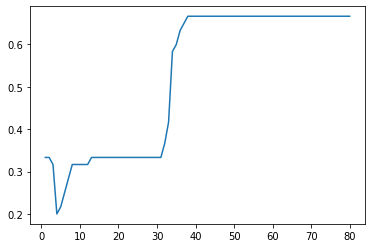

epoch-loss


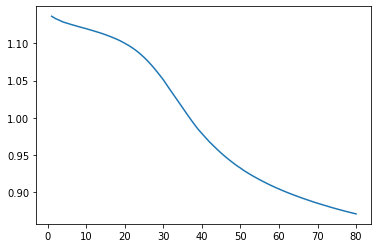

In [15]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
# 运行环境
device = 'cuda' if torch.cuda.is_available() else 'cpu'


# data处理
def gen_data():
  iris = ds.load_iris()
  X = iris.data.astype(np.float32)
  Y = iris.target
  X_train = np.concatenate((X[0:30,],X[70:100,],X[100:130,])).astype(np.float32)
  Y_train = np.concatenate((Y[0:30],Y[70:100],Y[100:130]))
  X_test = np.concatenate((X[30:50,],X[50:70,],X[130:150,])).astype(np.float32)
  Y_test = np.concatenate((Y[30:50],Y[50:70],Y[130:150]))
  return (Iris_Data_Set(X_train,Y_train),Iris_Data_Set(X_test,Y_test))

class Iris_Data_Set(Dataset):
  def __init__(self,X,Y,n = 3):
    self.X = X
    self.size = len(Y)
    self.Y = np.zeros((len(Y),n)).astype(np.float32)
    for i in range(self.size):
        self.Y[i,Y[i]] += 1
    self.Y_ex = Y
  def __len__(self):
    return len(self.Y)
  def __getitem__(self,idx):
    return self.X[idx],self.Y[idx]
train_data,test_data = gen_data()
train_dataloader = DataLoader(train_data, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=True)


#网络定义
class FC_Neural_Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(4, 3), nn.Softmax()
    )
  def forward(self,x):
    predict = self.layer(x)
    return predict
#运行函数
def network():
  learning_rate = 1e-3
  epoch = 80

  model = FC_Neural_Network()
  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
  loss_arr = []
  acc_arr = []

  # 循环过程
  for i in range(epoch):
    print("epoch", i)
    data_loader = train_dataloader
    #train
    total = len(data_loader.dataset)
    for batch,(X,Y) in enumerate(data_loader):
      predict = model(X)
      loss = loss_fn(predict,Y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      print("{}/{}, loss = {}".format(batch * len(X),total,loss))

    #test  
    data_loader = test_dataloader  
    size = len(data_loader.dataset)
    num_batches = len(data_loader)
    test_loss, correct = 0, 0
    with torch.no_grad():
      for X,Y in data_loader:
        predict = model(X)
        test_loss += loss_fn(predict, Y).item()
        correct += 1 if predict.argmax() == Y.argmax() else 0
    test_loss /= num_batches
    correct /= size
    loss_arr.append(test_loss)
    acc_arr.append(correct)
    print("test_loss = {},accuracy = {}".format(test_loss,correct))
  print("acc")
  plt.plot(range(1,len(acc_arr)+1), acc_arr)
  plt.show()
  print("epoch-loss")
  plt.plot(range(1,len(loss_arr)+1), loss_arr)
  plt.show()

network()

简单的nn模型self.layer = nn.Sequential(nn.Linear(4, 3), nn.Softmax())容易陷入极值点，故下面进行更多模型的尝试。

epoch 0
0/90, loss = 1.106244683265686
10/90, loss = 1.111430287361145
20/90, loss = 1.1164805889129639
30/90, loss = 1.0909614562988281
40/90, loss = 1.1045706272125244
50/90, loss = 1.1126253604888916
60/90, loss = 1.0795342922210693
70/90, loss = 1.0909051895141602
80/90, loss = 1.0871648788452148
test_loss = 1.0979089558124542,accuracy = 0.3333333333333333
epoch 1
0/90, loss = 1.0735254287719727
10/90, loss = 1.0969691276550293
20/90, loss = 1.1055761575698853
30/90, loss = 1.0985918045043945
40/90, loss = 1.1069272756576538
50/90, loss = 1.0981128215789795
60/90, loss = 1.0975456237792969
70/90, loss = 1.0986087322235107
80/90, loss = 1.093759536743164
test_loss = 1.0946572740872702,accuracy = 0.3333333333333333
epoch 2
0/90, loss = 1.095142126083374
10/90, loss = 1.0883772373199463
20/90, loss = 1.075843095779419
30/90, loss = 1.1030035018920898
40/90, loss = 1.088793158531189
50/90, loss = 1.0946418046951294
60/90, loss = 1.0941931009292603
70/90, loss = 1.0937349796295166
80/90

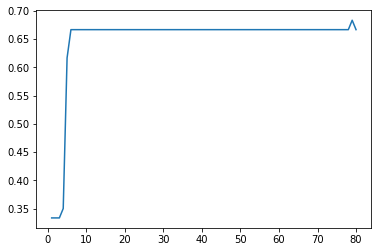

epoch-loss


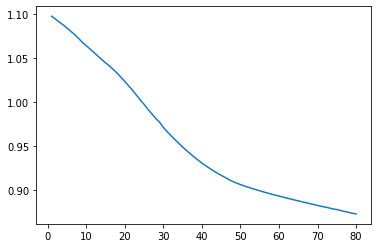

In [55]:
class FC_Neural_Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(4,10),
        nn.ReLU(),
        nn.Linear(10,4),
        nn.ReLU(),
        nn.Linear(4,3),
        nn.ReLU(),
        nn.Softmax(dim=1) 
    )
  def forward(self,x):
    predict = self.layer(x)
    return predict

network()

再尝试更深的模型

epoch 0
0/90, loss = 1.0867557525634766
10/90, loss = 1.1094770431518555
20/90, loss = 1.1173322200775146
30/90, loss = 1.1016359329223633
40/90, loss = 1.1016699075698853
50/90, loss = 1.1014950275421143
60/90, loss = 1.1089365482330322
70/90, loss = 1.0793657302856445
80/90, loss = 1.0869134664535522
test_loss = 1.0990248203277588,accuracy = 0.3333333333333333
epoch 1
0/90, loss = 1.1014072895050049
10/90, loss = 1.108859658241272
20/90, loss = 1.093966007232666
30/90, loss = 1.0869414806365967
40/90, loss = 1.101299524307251
50/90, loss = 1.1015336513519287
60/90, loss = 1.0867857933044434
70/90, loss = 1.101064920425415
80/90, loss = 1.1090211868286133
test_loss = 1.0989627639452617,accuracy = 0.3333333333333333
epoch 2
0/90, loss = 1.086652398109436
10/90, loss = 1.0866925716400146
20/90, loss = 1.1086456775665283
30/90, loss = 1.1088759899139404
40/90, loss = 1.0939862728118896
50/90, loss = 1.116135835647583
60/90, loss = 1.0866726636886597
70/90, loss = 1.108751893043518
80/90,

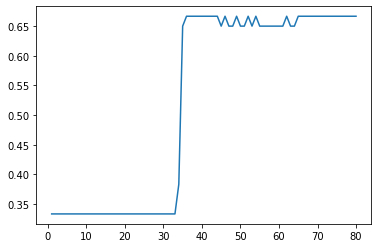

epoch-loss


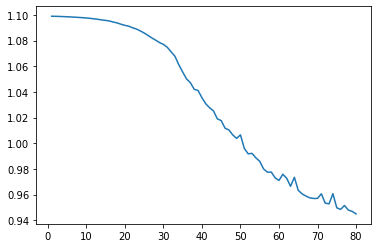

In [31]:
class FC_Neural_Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(4,10),
        nn.ReLU(),
        nn.Linear(10,4),
        nn.ReLU(),
        nn.Linear(4,10),
        nn.ReLU(),
        nn.Linear(10,10),
        nn.ReLU(),
        nn.Linear(10,10),
        nn.ReLU(),
        nn.Linear(10,3),
        nn.ReLU(),
        nn.Softmax(dim=1) 
    )
  def forward(self,x):
    predict = self.layer(x)
    return predict

network()

可以看到仍然陷入了极值点，我们使用网络时要对模型进行比较透彻的研究，盲目尝试模型只能瞎猜测


## LeNet网络结构如下：  
（i）第1层卷积层Conv-1： 6个5*5*1大小的滤波器， stride=1，padding=2，接Sigmoid做激活函数；  
（ii）接下来是池化层AvePool-1，它以2*2、stride=2做Average Pooling操作；  
（iii）第2层卷积层Conv-2： 16个5*5*6大小的滤波器， stride=1，padding=0，接Sigmoid做激活函数；  
（iv）再接一个池化层AvePool--2，它以2*2、stride=2做Average Pooling操作；  
（v）对AvePool--2层输出做了Flatten操作后，与120个神经元做全连接，构成FC-1，Sigmoid做激活函数；  
（vi）再与84个神经元做全连接，构成FC-2，Sigmoid做激活函数；  
（vii）再全连接10个神经元输出，用Softmax完成10个类别的分类。   

训练完成后，在测试集上随机抽取10个样本，观察分类结果。 


epoch 0
loss: 2.345893  [    0/60000]
loss: 2.297865  [25600/60000]
loss: 1.452892  [51200/60000]
Test Test Error: 
 Accuracy: 69.0%, Avg loss: 1.100227 

Train Test Error: 
 Accuracy: 68.5%, Avg loss: 1.110877 

epoch 1
loss: 1.155763  [    0/60000]
loss: 0.665491  [25600/60000]
loss: 0.462808  [51200/60000]
Test Test Error: 
 Accuracy: 85.9%, Avg loss: 0.489830 

Train Test Error: 
 Accuracy: 85.5%, Avg loss: 0.495594 

epoch 2
loss: 0.480609  [    0/60000]
loss: 0.367601  [25600/60000]
loss: 0.343042  [51200/60000]
Test Test Error: 
 Accuracy: 91.5%, Avg loss: 0.299293 

Train Test Error: 
 Accuracy: 91.0%, Avg loss: 0.312639 

epoch 3
loss: 0.396406  [    0/60000]
loss: 0.275484  [25600/60000]
loss: 0.268076  [51200/60000]
Test Test Error: 
 Accuracy: 93.7%, Avg loss: 0.218738 

Train Test Error: 
 Accuracy: 93.3%, Avg loss: 0.232021 

epoch 4
loss: 0.236902  [    0/60000]
loss: 0.204575  [25600/60000]
loss: 0.191314  [51200/60000]
Test Test Error: 
 Accuracy: 95.1%, Avg loss: 0.16

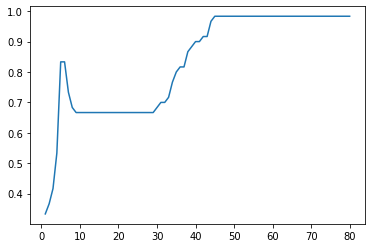

epoch-loss


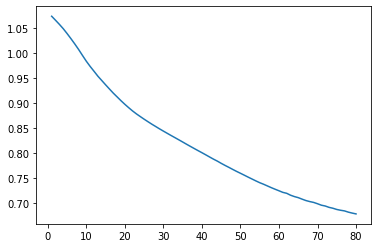

训练集预测


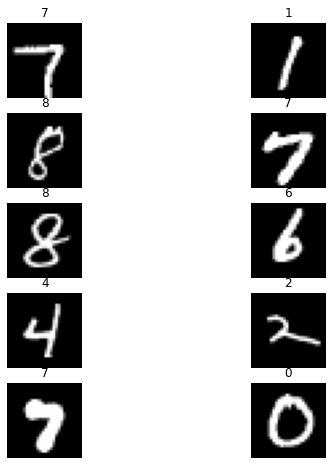

In [72]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


#网络定义
class LeNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv = nn.Sequential(
          nn.Conv2d(1, 6, 5),  
          nn.Sigmoid(),
          nn.MaxPool2d(2, 2),  
          nn.Conv2d(6, 16, 5),
          nn.Sigmoid(),
          nn.MaxPool2d(2, 2)
      )
      self.fc = nn.Sequential(
          nn.Linear(16 * 4 * 4, 120),
          nn.Sigmoid(),
          nn.Linear(120, 84),
          nn.Sigmoid(),
          nn.Linear(84, 10)
      )
    def forward(self,x):
      y = self.conv(x)
      predict = self.fc(y.view(x.shape[0], -1))
      return predict

def test(dataloader,model,loss_fn,loss_arr,acc_arr,flag):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  loss_arr.append(test_loss)
  acc_arr.append(correct)
  print(flag,end=' ')
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

#运行函数
def network():
  batch_size = 256
  total_epoch = 10
  learning_rate = 1e-3

  training_dataloader = DataLoader(training_data,batch_size=batch_size,shuffle=True)
  test_dataloader = DataLoader(test_data,batch_size=256,shuffle=True)
  train_v_dataloader = DataLoader(training_data,batch_size=256,shuffle=True)
  train_loss = []
  train_acc = []
  test_loss = []
  test_acc = []
  model = LeNet()
  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # 循环过程
  for i in range(total_epoch):
    print("epoch", i)
    #train
    dataloader = training_dataloader
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
      pred = model(X)
      loss = loss_fn(pred, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if batch % 100 == 0:
        loss, current = loss.item(), batch * len(X)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    #test  
    test(test_dataloader,model,loss_fn,test_loss,test_acc,'Test')
    test(train_v_dataloader,model,loss_fn,train_loss,test_loss,'Train')

  print("acc")
  plt.plot(range(1,len(acc_arr)+1), acc_arr)
  plt.show()
  print("epoch-loss")
  plt.plot(range(1,len(loss_arr)+1), loss_arr)
  plt.show()

  print("训练集预测")
  figure = plt.figure(figsize=(8, 8))
  cols, rows = 2, 5
  for i in range(1, cols * rows + 1):
    sample = next(iter(train_v_dataloader))
    img,label = sample
    figure.add_subplot(rows, cols, i)
    predict = model.forward(img).argmax(1)
    if predict[i] == label[i]:
        plt.title("{}".format(label[i]))
    else:
        plt.title("output={},expect={}".format(predict[i],label[i]))
    plt.axis("off")
    plt.imshow(img[i].squeeze(), cmap="gray")
  plt.show()

  
network() 